In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from math import ceil

sns.set_style('whitegrid')
%matplotlib inline

## Weather 

In [2]:
weather_df = pd.read_csv('../data/weather.csv')

In [3]:
weather_df.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [4]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [5]:
weather_df.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

No null value in any column. Warrants investigation.

In [6]:
weather_df.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [7]:
def get_int_list(col):
    int_list = []
    for i in col:
        try:
            int_list.append(float(i))
        except ValueError:
            pass
            
    return int_list

def get_non_int_list(col):
    non_int_list = []
    for i in col:
        try:
            int(i)
        except ValueError:
            non_int_list.append(i)
            
    return non_int_list

def get_float_list(col):
    float_list = []
    for i in col:
        try:
            float_list.append(float(i))
        except ValueError:
            pass
            
    return float_list

def get_non_float_list(col):
    non_float_list = []
    for i in col:
        try:
            float(i)
        except ValueError:
            non_float_list.append(i)
            
    return non_float_list

def to_int(value):
    try:
        converted_to_int = int(value)
        return converted_to_int
    except ValueError:
        # print(value)
        return np.nan
    
def to_float(value):
    try:
        return float(value)
    except ValueError:
        return value.strip()
    
def to_na(value):
    if value == 'M':
        return np.nan
    else:
        return value

## Station

In [8]:
weather_df['Station'].value_counts(dropna=False)

1    1472
2    1472
Name: Station, dtype: int64

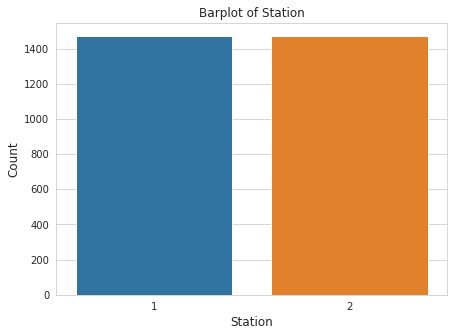

In [9]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Station', data=weather_df)

plt.title('Barplot of Station', fontsize=12)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('../images/1_bar_station.png', transparent=True)

## Date

In [10]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

In [11]:
weather_df['Date'].isnull().sum()

0

In [12]:
print("Earliest Date:", weather_df['Date'].min())
print("Latest Date:", weather_df['Date'].max())

Earliest Date: 2007-05-01 00:00:00
Latest Date: 2014-10-31 00:00:00


In [13]:
pd.DatetimeIndex(weather_df['Date']).year.value_counts().sort_index()

2007    368
2008    368
2009    368
2010    368
2011    368
2012    368
2013    368
2014    368
Name: Date, dtype: int64

In [14]:
pd.DatetimeIndex(weather_df['Date']).month.value_counts().sort_index()

5     496
6     480
7     496
8     496
9     480
10    496
Name: Date, dtype: int64

In [15]:
pd.DatetimeIndex(weather_df['Date']).day.value_counts().sort_index()

1     96
2     96
3     96
4     96
5     96
6     96
7     96
8     96
9     96
10    96
11    96
12    96
13    96
14    96
15    96
16    96
17    96
18    96
19    96
20    96
21    96
22    96
23    96
24    96
25    96
26    96
27    96
28    96
29    96
30    96
31    64
Name: Date, dtype: int64

In [16]:
weather_df.rename(columns = {'Date': 'CalendarDate'}, inplace=True)

In [17]:
# Year
weather_df['Year'] = pd.DatetimeIndex(weather_df['CalendarDate']).year

# Month
weather_df['Month'] = pd.DatetimeIndex(weather_df['CalendarDate']).month

# Date
weather_df['Date'] = pd.DatetimeIndex(weather_df['CalendarDate']).day

In [18]:
weather_df[weather_df['CalendarDate'] == '2007-05-04']

,Station,CalendarDate,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Date
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,0.0,T,29.31,30.05,10.4,8,10.8,2007,5,4
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,M,0.00,29.36,30.04,10.1,7,10.4,2007,5,4


## Tmax

In [19]:
weather_df['Tmax'].isnull().sum()

0

In [20]:
print("Index:", weather_df['Tmax'].idxmax(), "Tmax:", weather_df['Tmax'].max())
print("Index:", weather_df['Tmax'].idxmin(), "Tmax:", weather_df['Tmax'].min())

Index: 1973 Tmax: 104
Index: 2557 Tmax: 41


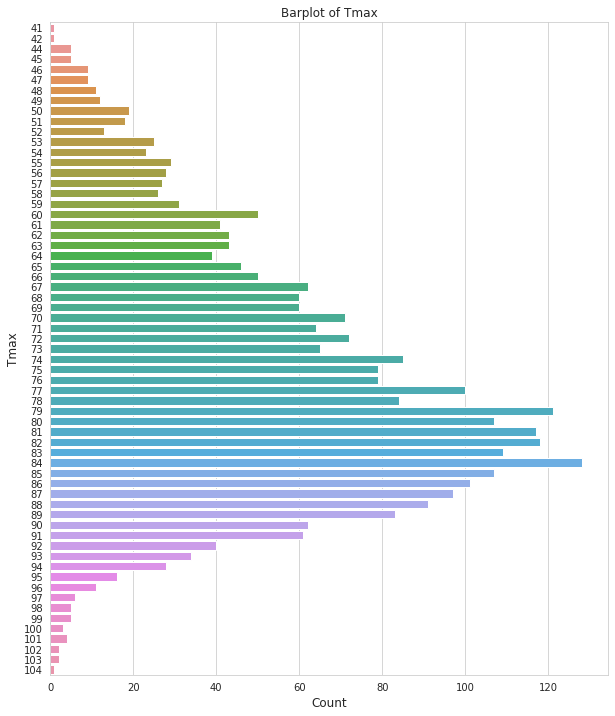

In [21]:
# Plot barchart
plt.figure(figsize=(10, 12))
sns.countplot(y='Tmax', data=weather_df, orient='v')

plt.title('Barplot of Tmax', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Tmax', fontsize=12)
plt.savefig('../images/2_bar_tmax.png', transparent=True)

## Tmin

In [22]:
weather_df['Tmin'].isnull().sum()

0

In [23]:
print("Index:", weather_df['Tmin'].idxmax(), "Tmin:", weather_df['Tmin'].max())
print("Index:", weather_df['Tmin'].idxmin(), "Tmin:", weather_df['Tmin'].min())

Index: 1973 Tmin: 83
Index: 1062 Tmin: 29


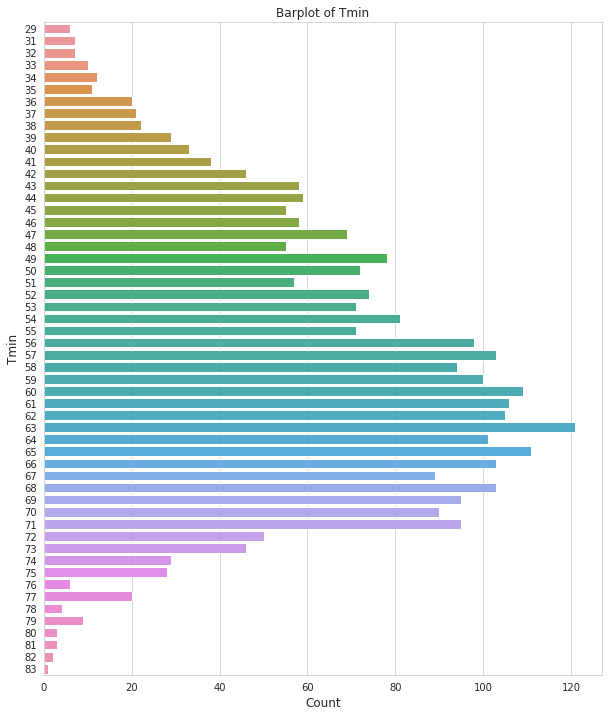

In [24]:
# Plot barchart
plt.figure(figsize=(10, 12))
sns.countplot(y='Tmin', data=weather_df, orient='v')

plt.title('Barplot of Tmin', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Tmin', fontsize=12)
plt.savefig('../images/3_bar_tmin.png', transparent=True)

## Tavg

In [25]:
weather_df['Tavg'].head()

0    67
1    68
2    51
3    52
4    56
Name: Tavg, dtype: object

In [26]:
non_int_list = get_non_int_list(weather_df['Tavg'])
print(Counter(non_int_list).keys())
Counter(non_int_list).values()

dict_keys(['M'])


dict_values([11])

In [27]:
weather_df['Tavg'] = weather_df['Tavg'].map(to_int)
weather_df['Tavg'] = weather_df['Tavg'].astype('Int64')

In [28]:
weather_df['Tavg'].isnull().sum()

11

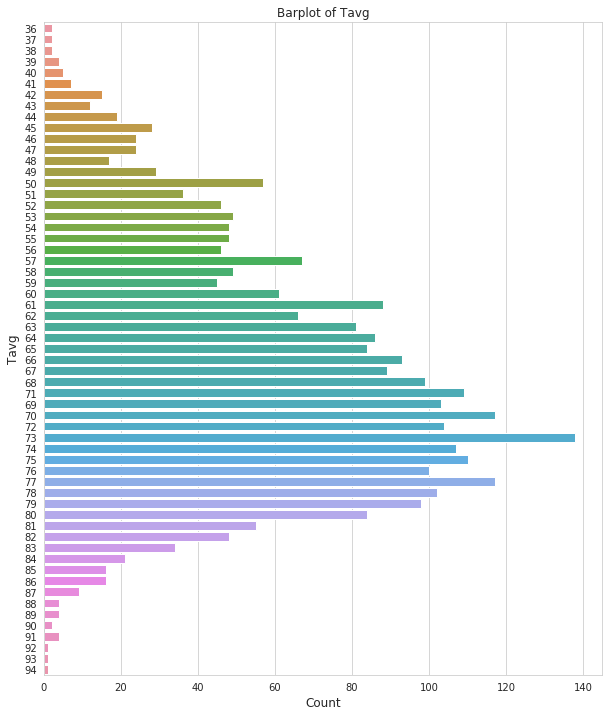

In [29]:
# Plot barchart
# see if na values are factored in

plt.figure(figsize=(10, 12))
sns.countplot(y='Tavg', data=weather_df, orient='v')

plt.title('Barplot of Tavg', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Tavg', fontsize=12)
plt.savefig('../images/4_bar_tavg.png', transparent=True)

## Depart

In [30]:
weather_df['Depart'].head()

0    14
1     M
2    -3
3     M
4     2
Name: Depart, dtype: object

In [31]:
int_list = get_int_list(weather_df['Depart'])
key_value_list = list(zip(Counter(int_list).keys(), Counter(int_list).values()))
sorted(key_value_list, key=lambda x: x[0])

[(-17.0, 2),
 (-16.0, 3),
 (-15.0, 3),
 (-14.0, 6),
 (-13.0, 5),
 (-12.0, 8),
 (-11.0, 10),
 (-10.0, 22),
 (-9.0, 25),
 (-8.0, 43),
 (-7.0, 30),
 (-6.0, 50),
 (-5.0, 57),
 (-4.0, 56),
 (-3.0, 72),
 (-2.0, 80),
 (-1.0, 84),
 (0.0, 74),
 (1.0, 76),
 (2.0, 93),
 (3.0, 75),
 (4.0, 71),
 (5.0, 77),
 (6.0, 67),
 (7.0, 76),
 (8.0, 59),
 (9.0, 47),
 (10.0, 46),
 (11.0, 28),
 (12.0, 28),
 (13.0, 23),
 (14.0, 22),
 (15.0, 15),
 (16.0, 12),
 (17.0, 7),
 (18.0, 6),
 (19.0, 4),
 (20.0, 4),
 (21.0, 2),
 (22.0, 3),
 (23.0, 1)]

In [32]:
non_int_list = get_non_int_list(weather_df['Depart'])
print(Counter(non_int_list).keys())
Counter(non_int_list).values()

dict_keys(['M'])


dict_values([1472])

In [33]:
weather_df['Depart'] = weather_df['Depart'].map(to_int)
weather_df['Depart'] = weather_df['Depart'].astype('Int64')

In [34]:
weather_df['Depart'].isnull().sum()

1472

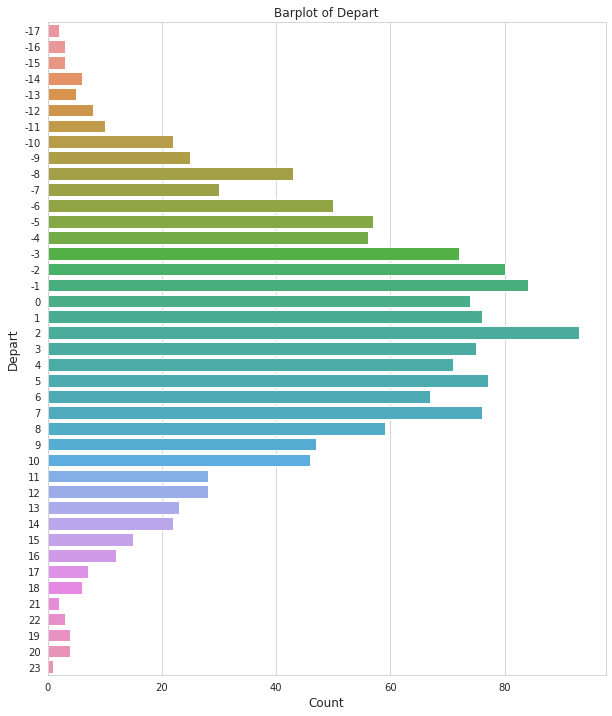

In [35]:
# Plot barchart

plt.figure(figsize=(10, 12))
sns.countplot(y='Depart', data=weather_df, orient='v')

plt.title('Barplot of Depart', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Depart', fontsize=12)
plt.savefig('../images/5_bar_depart.png', transparent=True)

## DewPoint

In [36]:
weather_df['DewPoint'].head()

0    51
1    51
2    42
3    42
4    40
Name: DewPoint, dtype: int64

In [37]:
weather_df['DewPoint'].isnull().sum()

0

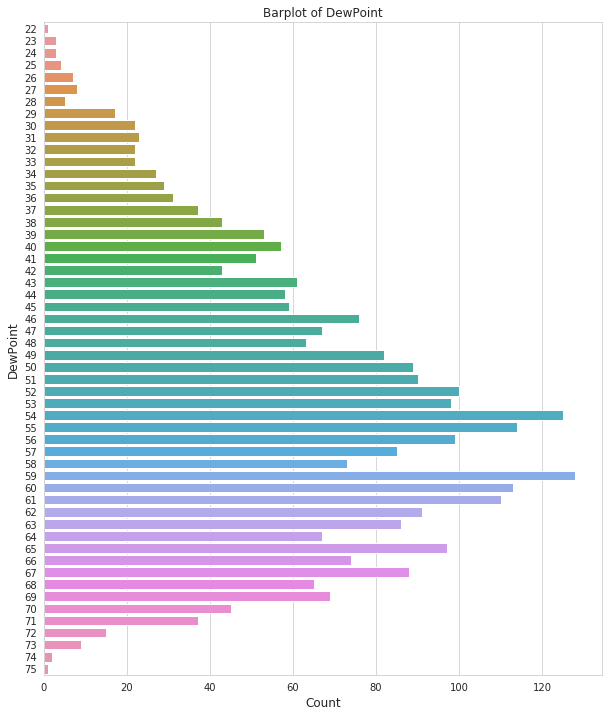

In [38]:
# Plot barchart

plt.figure(figsize=(10, 12))
sns.countplot(y='DewPoint', data=weather_df, orient='v')

plt.title('Barplot of DewPoint', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('DewPoint', fontsize=12)
plt.savefig('../images/6_bar_dewpoint.png', transparent=True)

## WetBulb

In [39]:
weather_df['WetBulb'].head()

0    56
1    57
2    47
3    47
4    48
Name: WetBulb, dtype: object

In [40]:
int_list = get_int_list(weather_df['WetBulb'])
print(len(int_list))
print(Counter(int_list).keys())
Counter(int_list).values()

2940
dict_keys([56.0, 57.0, 47.0, 48.0, 50.0, 49.0, 46.0, 54.0, 53.0, 62.0, 63.0, 60.0, 61.0, 51.0, 59.0, 58.0, 43.0, 44.0, 45.0, 65.0, 66.0, 67.0, 64.0, 52.0, 55.0, 69.0, 68.0, 70.0, 72.0, 71.0, 73.0, 74.0, 76.0, 42.0, 39.0, 40.0, 41.0, 35.0, 33.0, 34.0, 75.0, 36.0, 32.0, 38.0, 78.0, 77.0, 37.0])


dict_values([95, 105, 61, 51, 55, 50, 72, 56, 69, 118, 135, 111, 123, 57, 129, 95, 31, 45, 53, 131, 113, 117, 121, 78, 99, 107, 98, 102, 71, 99, 56, 50, 8, 35, 15, 31, 19, 8, 5, 5, 20, 9, 1, 17, 1, 8, 5])

In [41]:
non_int_list = get_non_int_list(weather_df['WetBulb'])
print(Counter(non_int_list).keys())
Counter(non_int_list).values()

dict_keys(['M'])


dict_values([4])

In [42]:
weather_df['WetBulb'] = weather_df['WetBulb'].map(to_int)
weather_df['WetBulb'] = weather_df['WetBulb'].astype('Int64')

In [43]:
weather_df['WetBulb'].isnull().sum()

4

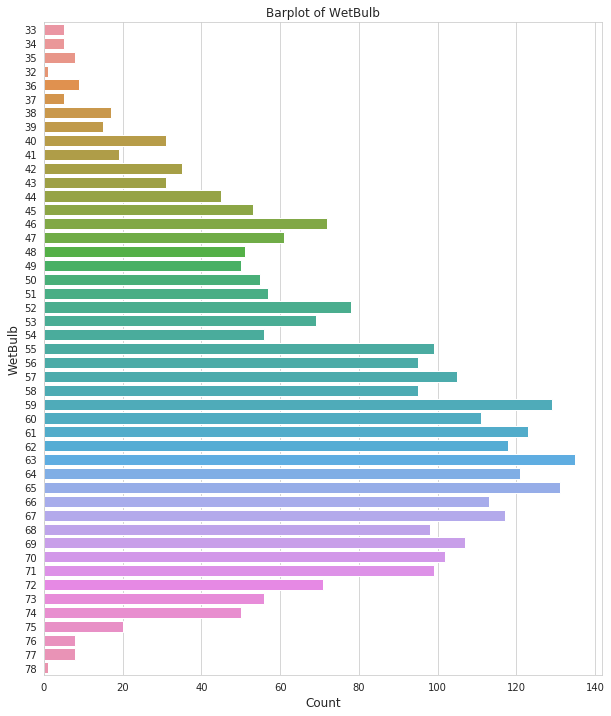

In [44]:
# Plot barchart

plt.figure(figsize=(10, 12))
sns.countplot(y='WetBulb', data=weather_df, orient='v')

plt.title('Barplot of WetBulb', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('WetBulb', fontsize=12)
plt.savefig('../images/7_bar_wetbulb.png', transparent=True)

## Heat

In [45]:
weather_df['Heat'].head()

0     0
1     0
2    14
3    13
4     9
Name: Heat, dtype: object

In [46]:
int_list = get_int_list(weather_df['Heat'])
print(len(int_list))
print(Counter(int_list).keys())
Counter(int_list).values()

2933
dict_keys([0.0, 14.0, 13.0, 9.0, 7.0, 5.0, 6.0, 4.0, 10.0, 8.0, 12.0, 3.0, 2.0, 1.0, 15.0, 16.0, 19.0, 17.0, 20.0, 11.0, 18.0, 21.0, 25.0, 24.0, 27.0, 26.0, 23.0, 28.0, 22.0, 29.0])


dict_values([1870, 36, 46, 46, 49, 61, 45, 88, 48, 67, 49, 66, 81, 86, 57, 29, 24, 17, 28, 48, 24, 19, 5, 7, 2, 4, 15, 2, 12, 2])

In [47]:
non_int_list = get_non_int_list(weather_df['Heat'])
print(Counter(non_int_list).keys())
Counter(non_int_list).values()

dict_keys(['M'])


dict_values([11])

In [48]:
weather_df['Heat'] = weather_df['Heat'].map(to_int)
weather_df['Heat'] = weather_df['Heat'].astype('Int64')

In [49]:
weather_df['Heat'].isnull().sum()

11

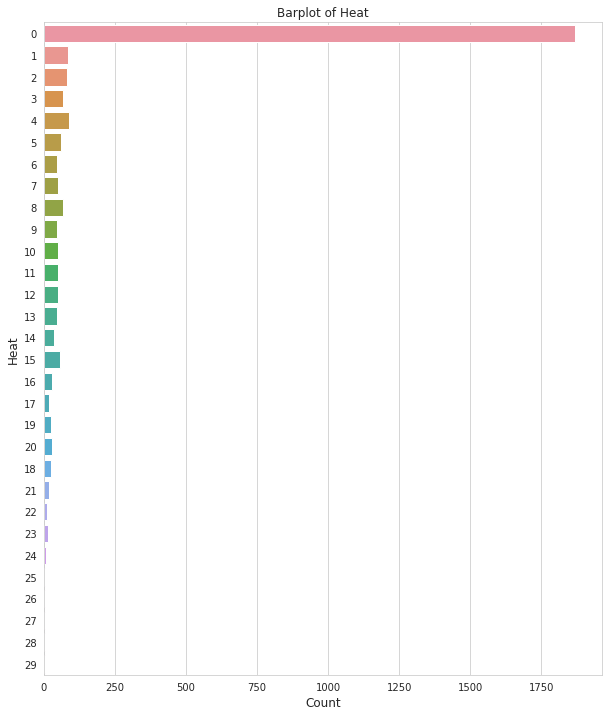

In [50]:
# Plot barchart

plt.figure(figsize=(10, 12))
sns.countplot(y='Heat', data=weather_df, orient='v')

plt.title('Barplot of Heat', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Heat', fontsize=12)
plt.savefig('../images/8_bar_heat.png', transparent=True)

## Cool

In [51]:
weather_df['Cool'].head()

0     2
1     3
2     0
3     0
4     0
Name: Cool, dtype: object

In [52]:
int_list = get_int_list(weather_df['Cool'])
print(len(int_list))
print(Counter(int_list).keys())
Counter(int_list).values()

2933
dict_keys([2.0, 3.0, 0.0, 5.0, 4.0, 6.0, 8.0, 7.0, 9.0, 10.0, 13.0, 11.0, 12.0, 1.0, 15.0, 16.0, 17.0, 14.0, 20.0, 19.0, 18.0, 21.0, 22.0, 24.0, 27.0, 23.0, 26.0, 28.0, 29.0, 25.0])


dict_values([89, 99, 1147, 117, 103, 109, 138, 104, 107, 110, 102, 100, 117, 93, 84, 55, 48, 98, 16, 21, 34, 16, 9, 4, 1, 4, 4, 1, 1, 2])

In [53]:
non_int_list = get_non_int_list(weather_df['Cool'])
print(Counter(non_int_list).keys())
Counter(non_int_list).values()

dict_keys(['M'])


dict_values([11])

In [54]:
weather_df['Cool'] = weather_df['Cool'].map(to_int)
weather_df['Cool'] = weather_df['Cool'].astype('Int64')

In [55]:
weather_df['Cool'].isnull().sum()

11

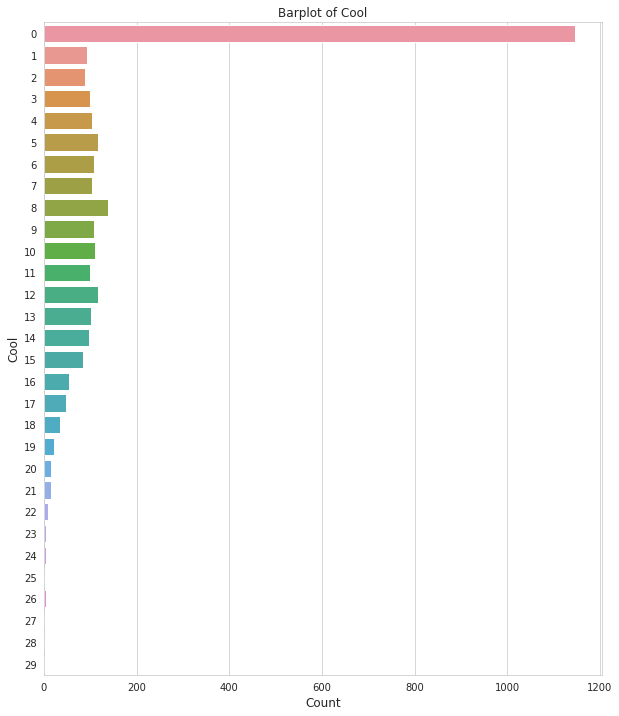

In [56]:
# Plot barchart

plt.figure(figsize=(10, 12))
sns.countplot(y='Cool', data=weather_df, orient='v')

plt.title('Barplot of Cool', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cool', fontsize=12)
plt.savefig('../images/9_bar_cool.png', transparent=True)

## Sunrise

In [57]:
weather_df['Sunrise'].head()

0    0448
1       -
2    0447
3       -
4    0446
Name: Sunrise, dtype: object

In [58]:
int_list = get_int_list(weather_df['Sunrise'])
print(len(int_list))
print(Counter(int_list).keys())
Counter(int_list).values()

1472
dict_keys([448.0, 447.0, 446.0, 444.0, 443.0, 442.0, 441.0, 439.0, 438.0, 437.0, 436.0, 435.0, 434.0, 433.0, 432.0, 431.0, 430.0, 429.0, 428.0, 427.0, 426.0, 425.0, 424.0, 423.0, 422.0, 421.0, 420.0, 419.0, 418.0, 417.0, 416.0, 440.0, 445.0, 449.0, 450.0, 451.0, 452.0, 453.0, 454.0, 455.0, 456.0, 457.0, 458.0, 459.0, 500.0, 501.0, 502.0, 503.0, 504.0, 505.0, 506.0, 508.0, 509.0, 510.0, 511.0, 512.0, 513.0, 514.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 521.0, 522.0, 523.0, 524.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 549.0, 550.0, 552.0, 553.0, 554.0, 555.0, 556.0, 557.0, 558.0, 559.0, 600.0, 602.0, 603.0, 604.0, 605.0, 606.0, 607.0, 608.0, 610.0, 611.0, 612.0, 613.0, 614.0, 616.0, 617.0, 618.0, 619.0, 620.0, 622.0, 623.0])


dict_values([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 24, 16, 16, 16, 16, 24, 16, 16, 32, 16, 24, 32, 24, 32, 40, 32, 64, 104, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [59]:
non_int_list = get_non_int_list(weather_df['Sunrise'])
print(Counter(non_int_list).keys())
Counter(non_int_list).values()

dict_keys(['-'])


dict_values([1472])

In [60]:
weather_df['Sunrise'].map(lambda x: len(x)).value_counts()

1    1472
4    1472
Name: Sunrise, dtype: int64

In [61]:
def to_hr_min_str(value):
    if len(value) == 4:
        return value[:2] + ':' + value[2:]
    elif len(value) == 1:
        return pd.NaT

In [62]:
weather_df['Sunrise'] = weather_df['Sunrise'].map(to_hr_min_str)

In [63]:
weather_df['Sunrise'].head()

0    04:48
1      NaT
2    04:47
3      NaT
4    04:46
Name: Sunrise, dtype: object

In [64]:
weather_df['Sunrise'].isnull().sum()

1472

In [65]:
try:
    pd.to_datetime(weather_df.Sunrise, format='%H:%M')
except Exception as e:
    print(str(e))

In [66]:
weather_df['Sunrise'] = weather_df['CalendarDate'] + pd.to_timedelta(weather_df.Sunrise + ':00')

In [67]:
# Plot barchart
# see if na values are factored in

## Sunset

In [68]:
weather_df['Sunset'].head()

0    1849
1       -
2    1850
3       -
4    1851
Name: Sunset, dtype: object

In [69]:
int_list = get_int_list(weather_df['Sunset'])
print(len(int_list))
print(Counter(int_list).keys())
Counter(int_list).values()

1472
dict_keys([1849.0, 1850.0, 1851.0, 1852.0, 1853.0, 1855.0, 1856.0, 1857.0, 1858.0, 1859.0, 1860.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1900.0, 1854.0, 1848.0, 1846.0, 1845.0, 1843.0, 1842.0, 1840.0, 1839.0, 1837.0, 1835.0, 1834.0, 1832.0, 1831.0, 1829.0, 1827.0, 1826.0, 1824.0, 1822.0, 1821.0, 1819.0, 1817.0, 1815.0, 1814.0, 1812.0, 1810.0, 1809.0, 1807.0, 1805.0, 1803.0, 1760.0, 1758.0, 1756.0, 1755.0, 1753.0, 1751.0, 1749.0, 1748.0, 1746.0, 1744.0, 1742.0, 1741.0, 1739.0, 1737.0, 1735.0, 1734.0, 1732.0, 1730.0, 1729.0, 1727.0, 1725.0, 1724.0, 1722.0, 1720.0, 1719.0, 1717.0, 1715.0, 1714.0, 1712.0, 1711.0, 1709.0, 1707.0, 1706.0, 1704.0, 1703.0, 1701.0, 1660.0, 1658.0, 1657.0, 1656.0, 1654.0, 1653.0, 1651.0, 1650.0, 1649.0, 1647.0])


dict_values([16, 8, 16, 16, 8, 16, 16, 8, 16, 16, 8, 8, 16, 16, 16, 8, 16, 16, 16, 16, 16, 16, 8, 16, 16, 16, 24, 16, 24, 16, 24, 16, 16, 32, 16, 32, 24, 32, 32, 48, 56, 96, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [70]:
non_int_list = get_non_int_list(weather_df['Sunset'])
print(Counter(non_int_list).keys())
Counter(non_int_list).values()

dict_keys(['-'])


dict_values([1472])

In [71]:
weather_df['Sunset'].map(lambda x: len(x)).value_counts()

1    1472
4    1472
Name: Sunset, dtype: int64

In [72]:
weather_df['Sunset'] = weather_df['Sunset'].map(to_hr_min_str)

In [73]:
weather_df['Sunset'].head()

0    18:49
1      NaT
2    18:50
3      NaT
4    18:51
Name: Sunset, dtype: object

In [74]:
weather_df['Sunset'].isnull().sum()

1472

In [75]:
weather_df['Sunset'].fillna(method='ffill', inplace=True)

In [76]:
try:
    pd.to_datetime(weather_df.Sunset)
except Exception as e:
    print(str(e))

minute must be in 0..59: 18:60


In [77]:
# with pd.option_context('display.max_rows', 500, 'display.max_columns', 24):
#     print(weather_df[weather_df.Sunset.str[3] == '6'])

In [78]:
weather_df.loc[list(range(2920, 2928, 1)), ['CalendarDate', 'Station', 'Sunrise', 'Sunset']]

,CalendarDate,Station,Sunrise,Sunset
2920,2014-10-20,1,2014-10-20 06:10:00,17:03
2921,2014-10-20,2,NaT,17:03
2922,2014-10-21,1,2014-10-21 06:11:00,17:01
2923,2014-10-21,2,NaT,17:01
2924,2014-10-22,1,2014-10-22 06:12:00,16:60
2925,2014-10-22,2,NaT,16:60
2926,2014-10-23,1,2014-10-23 06:13:00,16:58
2927,2014-10-23,2,NaT,16:58


In [79]:
erroneous_sunset_time_indices = weather_df[weather_df.Sunset.str[3] == '6'].index.tolist()

In [80]:
weather_df.loc[erroneous_sunset_time_indices, 'Sunset']

20      18:60
21      18:60
276     17:60
277     17:60
348     16:60
349     16:60
388     18:60
389     18:60
644     17:60
645     17:60
716     16:60
717     16:60
756     18:60
757     18:60
1012    17:60
1013    17:60
1084    16:60
1085    16:60
1124    18:60
1125    18:60
1380    17:60
1381    17:60
1452    16:60
1453    16:60
1492    18:60
1493    18:60
1748    17:60
1749    17:60
1820    16:60
1821    16:60
1860    18:60
1861    18:60
2116    17:60
2117    17:60
2188    16:60
2189    16:60
2228    18:60
2229    18:60
2484    17:60
2485    17:60
2556    16:60
2557    16:60
2596    18:60
2597    18:60
2852    17:60
2853    17:60
2924    16:60
2925    16:60
Name: Sunset, dtype: object

**Test on index 20**

In [81]:
weather_df['CalendarDate'].loc[20]

Timestamp('2007-05-11 00:00:00')

In [82]:
weather_df.Sunset.loc[20]

'18:60'

In [83]:
(weather_df.loc[~weather_df.Sunset.isnull(), 'CalendarDate'] + \
pd.to_timedelta(weather_df[~weather_df.Sunset.isnull()].Sunset.map(lambda x: x[:2]).astype(int), unit='h') + \
pd.to_timedelta(weather_df[~weather_df.Sunset.isnull()].Sunset.map(lambda x: x[3:]).astype(int), unit='m')).loc[20]

Timestamp('2007-05-11 19:00:00')

In [84]:
weather_df.loc[~weather_df.Sunset.isnull(), 'CalendarDate'] + \
pd.to_timedelta(weather_df[~weather_df.Sunset.isnull()].Sunset.map(lambda x: x[:2]).astype(int), unit='h') + \
pd.to_timedelta(weather_df[~weather_df.Sunset.isnull()].Sunset.map(lambda x: x[3:]).astype(int), unit='m')

0      2007-05-01 18:49:00
1      2007-05-01 18:49:00
2      2007-05-02 18:50:00
3      2007-05-02 18:50:00
4      2007-05-03 18:51:00
               ...        
2939   2014-10-29 16:50:00
2940   2014-10-30 16:49:00
2941   2014-10-30 16:49:00
2942   2014-10-31 16:47:00
2943   2014-10-31 16:47:00
Length: 2944, dtype: datetime64[ns]

In [85]:
weather_df['Sunset'] = \
weather_df['CalendarDate'] + \
pd.to_timedelta(weather_df.Sunset.map(lambda x: x[:2]).astype(int), unit='h') + \
pd.to_timedelta(weather_df.Sunset.map(lambda x: x[3:]).astype(int), unit='m')

In [86]:
weather_df.loc[erroneous_sunset_time_indices, 'Sunset']

20     2007-05-11 19:00:00
21     2007-05-11 19:00:00
276    2007-09-16 18:00:00
277    2007-09-16 18:00:00
348    2007-10-22 17:00:00
349    2007-10-22 17:00:00
388    2008-05-11 19:00:00
389    2008-05-11 19:00:00
644    2008-09-16 18:00:00
645    2008-09-16 18:00:00
716    2008-10-22 17:00:00
717    2008-10-22 17:00:00
756    2009-05-11 19:00:00
757    2009-05-11 19:00:00
1012   2009-09-16 18:00:00
1013   2009-09-16 18:00:00
1084   2009-10-22 17:00:00
1085   2009-10-22 17:00:00
1124   2010-05-11 19:00:00
1125   2010-05-11 19:00:00
1380   2010-09-16 18:00:00
1381   2010-09-16 18:00:00
1452   2010-10-22 17:00:00
1453   2010-10-22 17:00:00
1492   2011-05-11 19:00:00
1493   2011-05-11 19:00:00
1748   2011-09-16 18:00:00
1749   2011-09-16 18:00:00
1820   2011-10-22 17:00:00
1821   2011-10-22 17:00:00
1860   2012-05-11 19:00:00
1861   2012-05-11 19:00:00
2116   2012-09-16 18:00:00
2117   2012-09-16 18:00:00
2188   2012-10-22 17:00:00
2189   2012-10-22 17:00:00
2228   2013-05-11 19:00:00
2

In [87]:
# Plot barchart

---

In [88]:
# sorted(weather_df.Sunset.value_counts().index.tolist())

In [89]:
# weather_df['Sunrise'] = pd.to_datetime(weather_df.Sunrise, format='%H:%M')

In [90]:
# weather_df['Sunset'] = pd.to_datetime(weather_df['Sunset'], format='%H:%M')

In [91]:
# (weather_df['Sunset'] - weather_df['Sunrise'])

## CodeSum
Significant Weather Types / Weather Phenomena

In [92]:
weather_df['CodeSum'].head()

0         
1         
2       BR
3    BR HZ
4         
Name: CodeSum, dtype: object

In [93]:
weather_df['CodeSum'].value_counts(dropna=False)

                   1609
RA                  296
RA BR               238
BR                  110
TSRA RA BR           92
                   ... 
FG+ BCFG BR           1
TSRA BR HZ VCTS       1
FU                    1
RA FG+ BR             1
TS HZ                 1
Name: CodeSum, Length: 98, dtype: int64

In [94]:
print(weather_df['CodeSum'].value_counts(dropna=False).index)

Index([' ', 'RA', 'RA BR', 'BR', 'TSRA RA BR', 'BR HZ', 'RA DZ BR', 'TSRA RA',
       'HZ', 'RA BR HZ', 'TSRA', 'RA DZ', 'TSRA BR', 'TS TSRA RA BR', 'RA HZ',
       'TS RA', 'TSRA RA BR HZ', 'DZ BR', 'TS TSRA BR', 'TS', 'DZ BR HZ',
       'TSRA BR HZ', 'DZ', 'TS RA BR', 'TS TSRA', 'TS TSRA RA', 'RA DZ BR HZ',
       'TS TSRA BR HZ', 'TSRA RA BR VCTS', 'TSRA HZ', 'RA SN', 'FG+ BR',
       'TS BR', 'FG+ BR HZ', 'TSRA RA DZ BR HZ', 'TS TSRA RA BR HZ',
       'TSRA RA HZ', 'TSRA RA FG+ FG BR', 'RA BR SQ', 'FG BR HZ',
       'TSRA RA FG BR', 'RA BR VCTS', 'TSRA RA DZ BR', 'VCTS', 'FG+ FG BR HZ',
       'TSRA RA VCTS', 'BR HZ FU', 'RA BR HZ FU', 'TS BR HZ',
       'RA DZ FG+ FG BR', 'TSRA DZ FG+ FG BR HZ', 'RA VCTS',
       'TS TSRA GR RA BR', 'FG+ FG BR', 'TSRA FG+ BR', 'TSRA BR HZ FU',
       'RA DZ FG+ BR HZ', 'FG+', 'RA DZ FG+ BCFG BR', 'MIFG BCFG BR',
       'RA BR HZ VCTS', 'BR HZ VCFG', 'TS RA BR HZ', 'TS TSRA VCFG',
       'RA BR FU', 'BR VCTS', 'HZ VCTS', 'TSRA RA FG+ FG BR HZ', 'FG

In [95]:
weather_df['CodeSum'] = weather_df['CodeSum'].map(lambda x: '' if x == ' ' else x)

In [96]:
len(weather_df.loc[weather_df['CodeSum'] == '', 'CodeSum'])

1609

In [97]:
# Count Vectorize

# Instantiate a CountVectorizer
cvec = CountVectorizer(token_pattern=r'(?u)[\w+-]+')

# Fit the vectorizer on our corpus
cvec.fit(weather_df['CodeSum'])

# Transform the corpus
X_codesum = cvec.transform(weather_df['CodeSum'])
# print(type(X_codesum))
# print(X_codesum)

# Convert X_train into a DataFrame
X_codesum_df = pd.DataFrame(X_codesum.toarray(),
                   columns=list(map(lambda x: x.upper(), cvec.get_feature_names())))
X_codesum_df

,BCFG,BR,DZ,FG,FG+,FU,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2941,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2942,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


|Abbreviation|Weather Phenomena |
|:------------|:-----------------|
|BCFG|Fog Patches|
|BR|Mist|
|DZ|Drizzle|
|FG|Fog|
|FG+|Heavy Fog|
|FU|Smoke|
|GR|Hail|
|HZ|Haze|
|MIFG|Shallow Fog|
|RA|Rain|
|SN|Snow|
|SQ|Squall|
|TS|Thunderstorm|
|TSRA|Thunderstorm with rain|
|VCFG|Vicinity Fog|
|VCTS|Vicinity Thunderstorm|

References:
- https://www.aviationweather.gov/metar/symbol
- https://aviation.stackexchange.com/questions/23651/whats-the-difference-between-fog-fog-banks-and-fog-patches

In [98]:
X_weather_num_series = X_codesum_df.sum(axis=1).value_counts()
X_weather_num_series

0    1609
1     501
2     473
3     271
4      70
5      16
6       4
dtype: int64

Text(0, 0.5, 'Count')

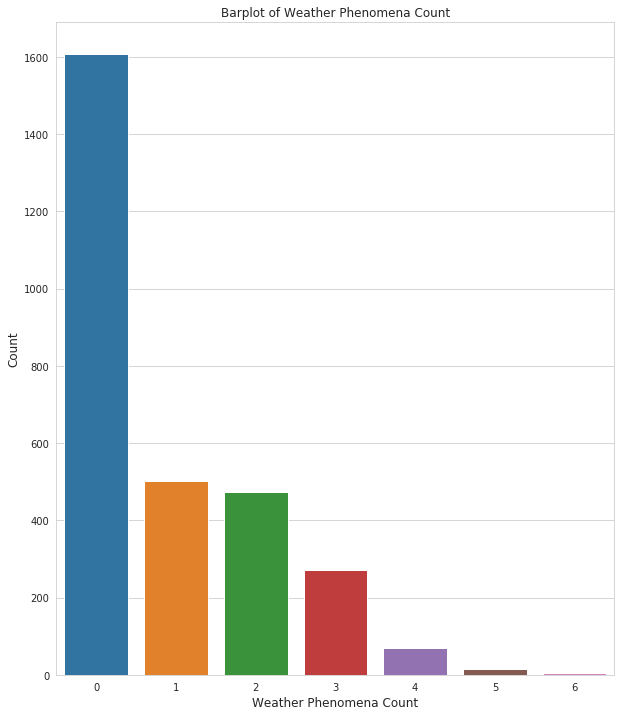

In [99]:
# Plot barchart

plt.figure(figsize=(10, 12))
sns.barplot(X_weather_num_series.index, X_weather_num_series.values)

plt.title('Barplot of Weather Phenomena Count', fontsize=12)
plt.xlabel('Weather Phenomena Count', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.savefig('../images/9_bar_cool.png', transparent=True)

In [100]:
X_weather_series = X_codesum_df.sum(axis=0)
X_weather_series

BCFG      5
BR      813
DZ      133
FG       16
FG+      27
FU        9
GR        1
HZ      263
MIFG      3
RA      935
SN        6
SQ        3
TS      102
TSRA    305
VCFG      4
VCTS     19
dtype: int64

Text(0, 0.5, 'Count')

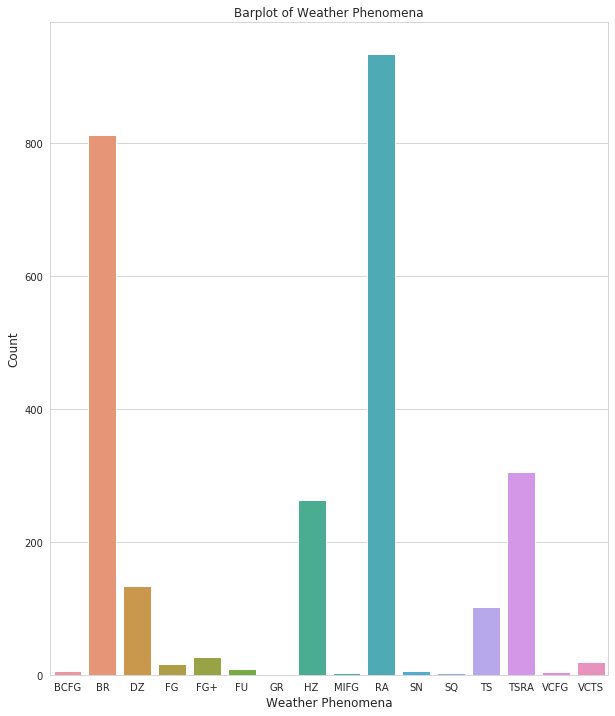

In [101]:
# Plot barchart

plt.figure(figsize=(10, 12))
sns.barplot(X_weather_series.index, X_weather_series.values)

plt.title('Barplot of Weather Phenomena', fontsize=12)
plt.xlabel('Weather Phenomena', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.savefig('../images/9_bar_cool.png', transparent=True)

## Depth

In [102]:
weather_df['Depth'].head()

0    0
1    M
2    0
3    M
4    0
Name: Depth, dtype: object

In [103]:
weather_df['Depth'].value_counts()

0    1472
M    1472
Name: Depth, dtype: int64

Text(0, 0.5, 'Count')

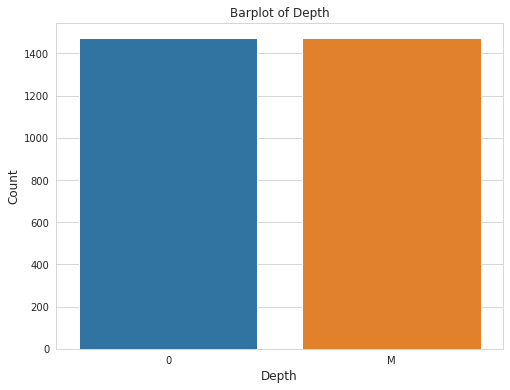

In [104]:
# Plot barchart

plt.figure(figsize=(8, 6))
sns.countplot(x='Depth', data=weather_df, orient='v')

plt.title('Barplot of Depth', fontsize=12)
plt.xlabel('Depth', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.savefig('../images/9_bar_cool.png', transparent=True)

In [105]:
int_list = get_int_list(weather_df['Depth'])
print(len(int_list))
print(Counter(int_list).keys())
Counter(int_list).values()

1472
dict_keys([0.0])


dict_values([1472])

In [106]:
non_int_list = get_non_int_list(weather_df['Depth'])
print(Counter(non_int_list).keys())
Counter(non_int_list).values()

dict_keys(['M'])


dict_values([1472])

In [107]:
weather_df['Depth'] = weather_df['Depth'].map(to_int)
weather_df['Depth'] = weather_df['Depth'].astype('Int64')

In [108]:
weather_df['Depth'].isnull().sum()

1472

## Water1

In [109]:
weather_df['Water1'].head()

0    M
1    M
2    M
3    M
4    M
Name: Water1, dtype: object

In [110]:
weather_df['Water1'].value_counts(dropna=False)

M    2944
Name: Water1, dtype: int64

In [111]:
non_int_list = get_non_int_list(weather_df['Water1'])
print(Counter(non_int_list).keys())
Counter(non_int_list).values()

dict_keys(['M'])


dict_values([2944])

In [112]:
weather_df['Water1'] = weather_df['Water1'].map(to_int)
weather_df['Water1'] = weather_df['Water1'].astype('Int64')

## SnowFall

In [113]:
weather_df['SnowFall'].head()

0    0.0
1      M
2    0.0
3      M
4    0.0
Name: SnowFall, dtype: object

In [114]:
values = weather_df['SnowFall'].values.tolist()
print(Counter(values).keys())
Counter(values).values()

dict_keys(['0.0', 'M', '  T', '0.1'])


dict_values([1459, 1472, 12, 1])

Text(0, 0.5, 'SnowFall')

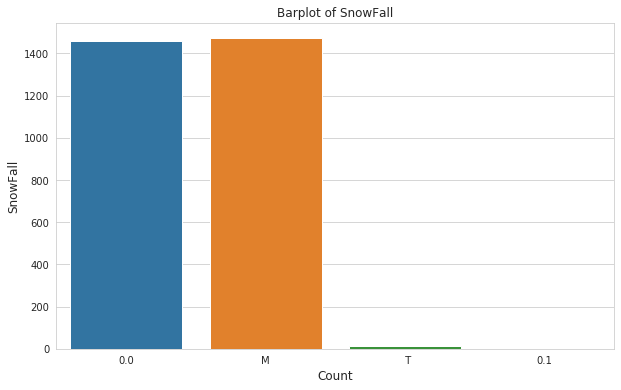

In [115]:
# Plot barchart

plt.figure(figsize=(10, 6))
sns.countplot(x='SnowFall', data=weather_df, orient='v')

plt.title('Barplot of SnowFall', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('SnowFall', fontsize=12)
# plt.savefig('../images/9_bar_cool.png', transparent=True)

In [116]:
weather_df['SnowFall'] = weather_df['SnowFall'].map(to_na)

In [117]:
weather_df['SnowFall'] = weather_df['SnowFall'].map(to_float)

In [118]:
## Handle T values
weather_df['SnowFall'] = weather_df['SnowFall'].map(lambda x: 0.00 if x == 'T' else x)

In [119]:
## Handle NaN values

In [120]:
## Plot bar

## PrecipTotal

In [121]:
weather_df['PrecipTotal'].head()

0    0.00
1    0.00
2    0.00
3    0.00
4    0.00
Name: PrecipTotal, dtype: object

In [122]:
weather_df['PrecipTotal'] = weather_df['PrecipTotal'].map(to_float)

In [123]:
non_float_list = get_non_float_list(weather_df['PrecipTotal'])
print(Counter(non_float_list).keys())
Counter(non_float_list).values()

dict_keys(['T', 'M'])


dict_values([318, 2])

In [124]:
float_list = get_float_list(weather_df['PrecipTotal'])
print(len(float_list))
print(sorted(Counter(float_list).keys()))
Counter(float_list).values()

2624
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.95, 0.96, 0.97, 0.98, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.09, 1.11, 1.12, 1.14, 1.15, 1.16, 1.18, 1.19, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.28, 1.29, 1.3, 1.31, 1.33, 1.34, 1.35, 1.38, 1.43, 1.44, 1.46, 1.48, 1.49, 1.55, 1.57, 1.58, 1.6, 1.61, 1.73, 1.75, 1.82, 1.88, 1.9, 1.96, 2.03, 2.06, 2.09, 2.17, 2.2, 2.24, 2.35, 2.43, 2.6, 2.68, 2.76, 2.79, 2.9, 3.07, 3.15, 3.17, 3.31, 3.64, 3.66, 3.97, 4.73, 6.64, 6.86]


dict_values([1577, 14, 63, 2, 3, 20, 23, 20, 21, 3, 15, 36, 28, 127, 2, 14, 9, 8, 9, 9, 3, 6, 21, 4, 5, 32, 8, 13, 3, 9, 4, 7, 10, 9, 3, 5, 4, 17, 46, 2, 4, 11, 3, 27, 2, 9, 11, 7, 7, 2, 2, 1, 7, 7, 3, 1, 1, 13, 11, 14, 2, 5, 7, 2, 3, 1, 3, 2, 1, 28, 4, 4, 8, 1, 4, 2, 6, 2, 1, 7, 3, 1, 7, 1, 1, 4, 1, 1, 1, 1, 1, 3, 6, 2, 6, 4, 3, 4, 1, 1, 5, 1, 1, 1, 3, 2, 2, 5, 10, 2, 5, 1, 4, 6, 2, 2, 2, 1, 1, 2, 1, 4, 5, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [125]:
weather_df['PrecipTotal'] = weather_df['PrecipTotal'].map(to_na)

Text(0, 0.5, 'Frequency')

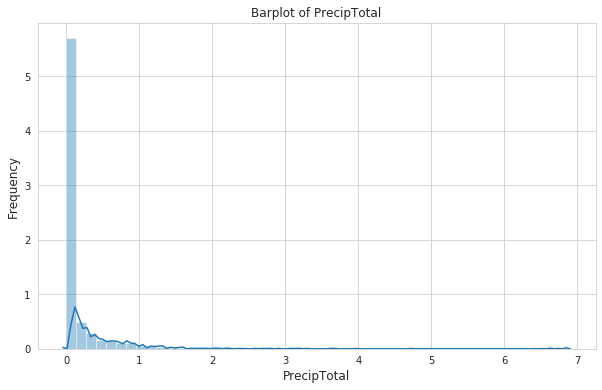

In [126]:
## Plot hist

plt.figure(figsize=(10, 6))
sns.distplot(weather_df[weather_df['PrecipTotal'] != 'T'][['PrecipTotal']].dropna())

plt.title('Barplot of PrecipTotal', fontsize=12)
plt.xlabel('PrecipTotal', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [127]:
## Handle T values
weather_df['PrecipTotal'] = weather_df['PrecipTotal'].map(lambda x: 0.00 if x == 'T' else x)

Text(0, 0.5, 'Frequency')

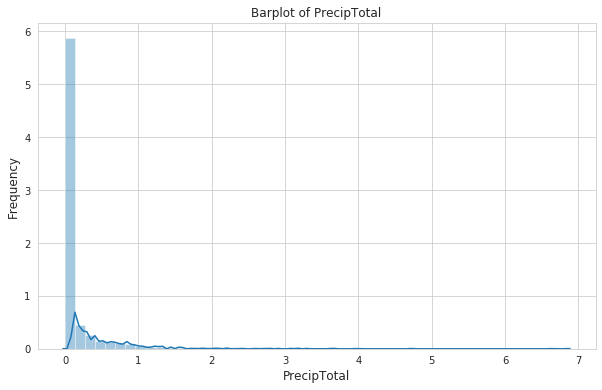

In [128]:
## Plot hist
plt.figure(figsize=(10, 6))
sns.distplot(weather_df[['PrecipTotal']].dropna())

plt.title('Barplot of PrecipTotal', fontsize=12)
plt.xlabel('PrecipTotal', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

## StnPressure

In [129]:
weather_df['StnPressure'].head()

0    29.10
1    29.18
2    29.38
3    29.44
4    29.39
Name: StnPressure, dtype: object

In [130]:
weather_df['StnPressure'] = weather_df['StnPressure'].map(to_float)

In [131]:
non_float_list = get_non_float_list(weather_df['StnPressure'])
print(Counter(non_float_list).keys())
Counter(non_float_list).values()

dict_keys(['M'])


dict_values([4])

In [132]:
float_list = get_float_list(weather_df['StnPressure'])
print(len(float_list))
print(Counter(float_list).keys())
Counter(float_list).values()

2940
dict_keys([29.1, 29.18, 29.38, 29.44, 29.39, 29.46, 29.31, 29.36, 29.4, 29.57, 29.62, 29.29, 29.21, 29.28, 29.2, 29.26, 29.33, 29.49, 29.54, 29.55, 29.23, 29.13, 29.19, 29.53, 29.6, 29.34, 29.41, 29.47, 29.51, 29.42, 29.43, 29.25, 29.03, 28.82, 28.87, 28.88, 29.16, 29.07, 28.84, 28.91, 29.24, 29.3, 29.12, 29.45, 29.56, 29.32, 29.05, 29.11, 29.06, 29.22, 29.08, 29.14, 29.37, 29.35, 29.15, 29.17, 29.48, 29.52, 29.27, 29.5, 28.59, 28.67, 28.75, 29.02, 29.79, 29.86, 29.63, 29.7, 28.95, 29.01, 28.79, 28.85, 28.97, 28.89, 28.94, 28.93, 28.98, 28.96, 29.0, 29.66, 29.09, 28.9, 29.04, 29.59, 29.65, 29.58, 29.61, 29.64, 29.71, 29.67, 28.8, 28.73, 29.68, 28.74, 28.55, 28.63, 28.92, 28.99, 28.81, 28.71, 28.69, 28.77, 28.83])


dict_values([49, 86, 64, 70, 89, 33, 106, 96, 37, 24, 12, 86, 107, 124, 60, 123, 81, 46, 32, 19, 104, 64, 39, 9, 15, 128, 91, 57, 25, 41, 17, 52, 23, 3, 5, 1, 55, 22, 2, 4, 82, 37, 17, 16, 10, 36, 25, 33, 11, 31, 41, 20, 24, 48, 62, 35, 14, 28, 31, 10, 1, 1, 1, 15, 1, 1, 5, 5, 13, 9, 4, 2, 19, 8, 3, 3, 11, 3, 24, 4, 13, 6, 5, 17, 9, 5, 4, 5, 1, 4, 3, 1, 3, 1, 1, 1, 6, 3, 2, 2, 1, 1, 1])

In [133]:
weather_df['StnPressure'] = weather_df['StnPressure'].map(to_na)

In [134]:
weather_df['StnPressure'].isnull().sum()

4

Text(0, 0.5, 'Frequency')

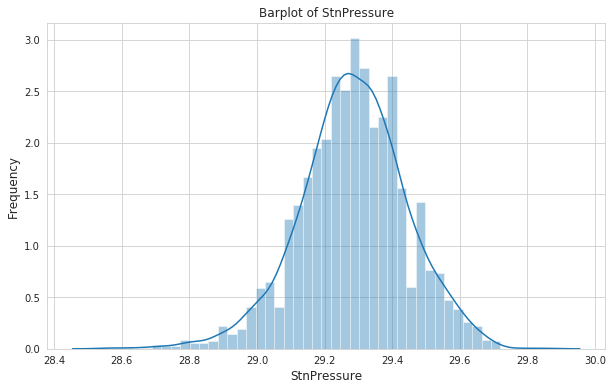

In [135]:
# Plot hist

plt.figure(figsize=(10, 6))
sns.distplot(weather_df[['StnPressure']].dropna())

plt.title('Barplot of StnPressure', fontsize=12)
plt.xlabel('StnPressure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [136]:
## SeaLevel

## SeaLevel

In [137]:
weather_df['SeaLevel'].head()

0    29.82
1    29.82
2    30.09
3    30.08
4    30.12
Name: SeaLevel, dtype: object

In [138]:
float_list = get_float_list(weather_df['SeaLevel'])
print(len(float_list))
print(Counter(float_list).keys())
Counter(float_list).values()

2935
dict_keys([29.82, 30.09, 30.08, 30.12, 30.05, 30.04, 30.1, 30.29, 30.28, 30.03, 30.02, 29.94, 29.93, 29.92, 29.91, 30.2, 30.19, 30.24, 29.97, 29.98, 29.84, 29.83, 30.27, 30.25, 30.26, 30.11, 30.06, 30.23, 30.15, 30.14, 30.0, 29.99, 29.9, 29.77, 29.76, 29.56, 29.54, 29.52, 29.51, 29.79, 29.78, 29.81, 29.55, 29.85, 30.07, 30.16, 29.96, 29.95, 30.13, 30.21, 30.22, 29.88, 30.01, 29.8, 29.89, 29.74, 29.87, 29.86, 30.18, 30.17, 29.34, 29.44, 29.45, 29.71, 29.72, 30.52, 30.53, 30.4, 30.41, 29.67, 29.53, 29.69, 29.61, 29.64, 29.63, 29.66, 29.7, 30.34, 30.33, 29.62, 29.6, 29.75, 29.68, 29.73, 30.31, 30.3, 30.32, 30.37, 30.39, 29.59, 29.65, 30.35, 30.36, 29.48, 30.38, 29.5, 29.25, 29.23, 29.46, 29.43, 29.47])


dict_values([44, 50, 55, 36, 81, 72, 53, 11, 9, 72, 80, 85, 79, 83, 80, 32, 14, 15, 73, 85, 47, 53, 16, 26, 15, 52, 69, 20, 24, 21, 96, 73, 60, 33, 28, 3, 3, 2, 2, 28, 19, 41, 6, 57, 52, 28, 77, 80, 41, 25, 17, 56, 72, 41, 82, 18, 62, 59, 23, 29, 2, 1, 4, 15, 11, 1, 1, 2, 1, 13, 4, 21, 8, 3, 4, 13, 19, 3, 10, 6, 9, 20, 9, 22, 6, 13, 7, 4, 1, 7, 8, 7, 4, 2, 2, 2, 1, 1, 1, 1, 1])

In [139]:
non_float_list = get_non_float_list(weather_df['SeaLevel'])
print(Counter(non_float_list).keys())
Counter(non_float_list).values()

dict_keys(['M'])


dict_values([9])

In [140]:
weather_df['SeaLevel'] = weather_df['SeaLevel'].map(to_float)

In [141]:
weather_df['SeaLevel'] = weather_df['SeaLevel'].map(to_na)

In [142]:
weather_df['SeaLevel'].isnull().sum()

9

Text(0, 0.5, 'Frequency')

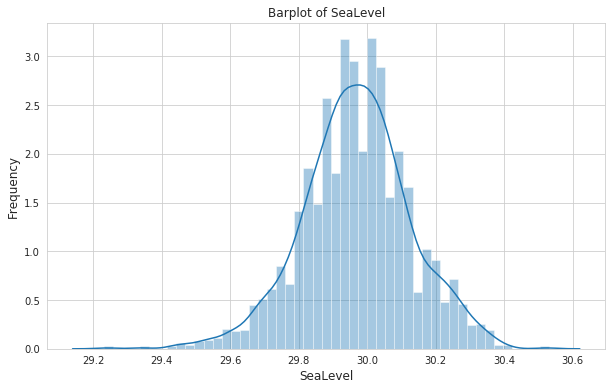

In [143]:
# Plot hist

plt.figure(figsize=(10, 6))
sns.distplot(weather_df[['SeaLevel']].dropna())

plt.title('Barplot of SeaLevel', fontsize=12)
plt.xlabel('SeaLevel', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

## ResultSpeed

In [144]:
weather_df['ResultSpeed'].head()

0     1.7
1     2.7
2    13.0
3    13.3
4    11.7
Name: ResultSpeed, dtype: float64

In [145]:
weather_df['ResultSpeed'].isnull().sum()

0

Text(0, 0.5, 'Frequency')

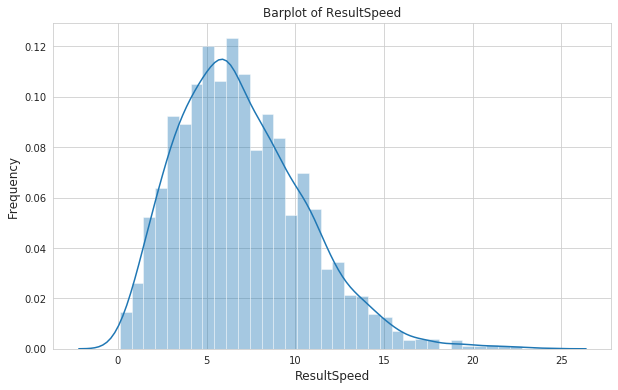

In [146]:
# Plot hist

plt.figure(figsize=(10, 6))
sns.distplot(weather_df[['ResultSpeed']])

plt.title('Barplot of ResultSpeed', fontsize=12)
plt.xlabel('ResultSpeed', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

## ResultDir

In [147]:
weather_df['ResultDir'].head()

0    27
1    25
2     4
3     2
4     7
Name: ResultDir, dtype: int64

In [148]:
weather_df['ResultDir'].isnull().sum()

0

Text(0, 0.5, 'Count')

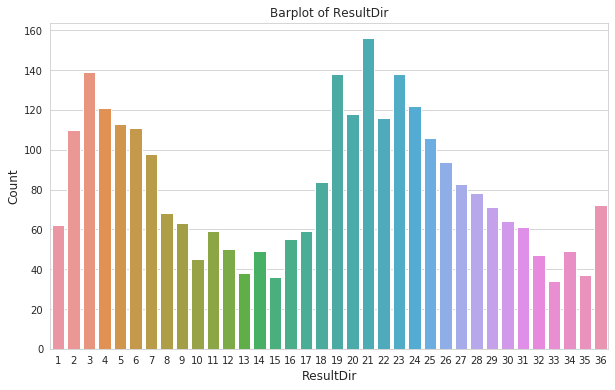

In [149]:
# Plot barchart

plt.figure(figsize=(10, 6))
sns.countplot(x='ResultDir', data=weather_df, orient='v')

plt.title('Barplot of ResultDir', fontsize=12)
plt.xlabel('ResultDir', fontsize=12)
plt.ylabel('Count', fontsize=12)

## AvgSpeed

In [150]:
weather_df['AvgSpeed'].head()

0     9.2
1     9.6
2    13.4
3    13.4
4    11.9
Name: AvgSpeed, dtype: object

In [151]:
float_list = get_float_list(weather_df['AvgSpeed'])
print(len(float_list))
print(Counter(float_list).keys())
Counter(float_list).values()

2941
dict_keys([9.2, 9.6, 13.4, 11.9, 13.2, 10.8, 10.4, 12.0, 11.5, 15.0, 14.5, 10.5, 9.9, 5.8, 5.4, 6.2, 5.9, 4.1, 3.9, 12.9, 12.8, 13.0, 8.1, 7.6, 17.3, 14.6, 12.3, 12.2, 11.8, 11.3, 7.5, 5.5, 11.4, 10.7, 9.7, 8.2, 7.8, 10.2, 10.6, 11.2, 15.2, 8.8, 7.2, 9.5, 5.3, 5.2, 6.5, 7.4, 10.1, 6.4, 6.7, 23.1, 20.7, 13.8, 12.4, 5.0, 4.7, 5.6, 6.9, 8.4, 10.0, 8.6, 6.8, 4.9, 6.1, 6.3, 15.1, 12.6, 7.7, 8.7, 9.0, 8.0, 6.0, 7.1, 8.5, 12.5, 13.3, 8.3, 7.3, 13.1, 12.7, 10.9, 11.1, 13.9, 6.6, 14.4, 9.1, 3.3, 3.5, 4.0, 7.0, 9.4, 7.9, 5.7, 4.3, 4.6, 3.7, 11.7, 4.4, 12.1, 13.5, 13.7, 11.0, 9.8, 8.9, 10.3, 15.5, 18.9, 17.2, 16.7, 18.0, 18.2, 16.8, 14.1, 14.7, 4.2, 9.3, 14.3, 17.7, 17.8, 15.9, 19.3, 17.4, 3.8, 4.8, 14.0, 21.5, 19.5, 16.3, 5.1, 3.6, 3.2, 4.5, 2.9, 3.1, 2.7, 18.4, 16.4, 14.8, 11.6, 13.6, 2.4, 2.6, 3.4, 3.0, 2.1, 20.2, 14.9, 16.2, 15.4, 17.9, 14.2, 15.3, 15.7, 16.1, 18.8, 17.1, 16.6, 26.3, 21.4, 23.2, 22.1, 15.6, 16.9, 2.0, 2.3, 1.7, 19.9, 17.6, 18.5, 18.1, 16.0, 15.8, 2.8, 1.9, 22.9, 22.6])


dict_values([44, 34, 11, 19, 17, 31, 24, 16, 40, 11, 6, 28, 32, 60, 35, 39, 41, 10, 15, 10, 10, 12, 49, 28, 5, 9, 13, 14, 12, 17, 39, 29, 18, 24, 26, 31, 38, 16, 20, 26, 5, 33, 39, 28, 17, 28, 39, 55, 37, 36, 33, 1, 2, 11, 19, 28, 21, 24, 63, 35, 26, 35, 41, 34, 35, 36, 6, 14, 44, 26, 40, 43, 42, 33, 32, 11, 8, 31, 42, 6, 20, 20, 20, 9, 38, 7, 41, 5, 11, 12, 47, 26, 40, 31, 17, 38, 8, 14, 16, 15, 6, 4, 19, 24, 27, 25, 3, 3, 4, 3, 2, 1, 1, 7, 4, 16, 29, 5, 3, 4, 1, 1, 2, 11, 24, 5, 1, 2, 4, 18, 7, 3, 18, 2, 3, 5, 1, 2, 3, 13, 9, 1, 1, 7, 5, 2, 1, 7, 1, 5, 1, 9, 5, 4, 6, 1, 1, 2, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [152]:
non_float_list = get_non_float_list(weather_df['AvgSpeed'])
print(Counter(non_float_list).keys())
Counter(non_float_list).values()

dict_keys(['M'])


dict_values([3])

In [153]:
weather_df['AvgSpeed'] = weather_df['AvgSpeed'].map(to_float)

In [154]:
weather_df['AvgSpeed'] = weather_df['AvgSpeed'].map(to_na)

In [155]:
weather_df['AvgSpeed'].isnull().sum()

3

Text(0, 0.5, 'Frequency')

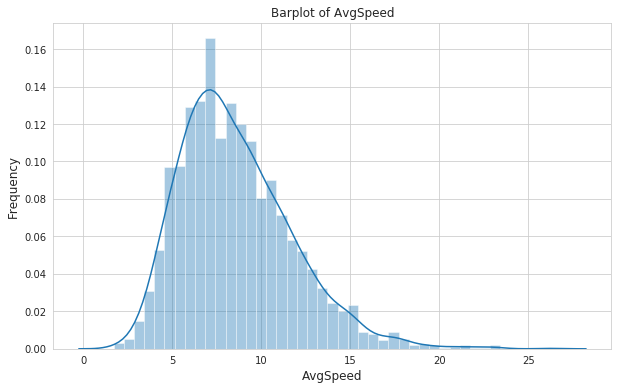

In [156]:
# Plot hist

plt.figure(figsize=(10, 6))
sns.distplot(weather_df[['AvgSpeed']].dropna())

plt.title('Barplot of AvgSpeed', fontsize=12)
plt.xlabel('AvgSpeed', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

## Null values

In [157]:
weather_df.isnull().sum()

Station            0
CalendarDate       0
Tmax               0
Tmin               0
Tavg              11
Depart          1472
DewPoint           0
WetBulb            4
Heat              11
Cool              11
Sunrise         1472
Sunset             0
CodeSum            0
Depth           1472
Water1          2944
SnowFall        1472
PrecipTotal        2
StnPressure        4
SeaLevel           9
ResultSpeed        0
ResultDir          0
AvgSpeed           3
Year               0
Month              0
Date               0
dtype: int64

In [158]:
weather_df.shape

(2944, 25)

In [159]:
weather_df.loc[weather_df['Depart'].isna(), 'Station'].value_counts()

2    1472
Name: Station, dtype: int64

In [160]:
weather_df.loc[weather_df['Sunrise'].isna(), 'Station'].value_counts()

2    1472
Name: Station, dtype: int64

In [161]:
weather_df.loc[weather_df['Sunset'].isna(), 'Station'].value_counts()

Series([], Name: Station, dtype: int64)

In [162]:
weather_df.loc[weather_df['Depth'].isna(), 'Station'].value_counts()

2    1472
Name: Station, dtype: int64

In [163]:
weather_df.loc[weather_df['Water1'].isna(), 'Station'].value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [164]:
weather_df.loc[weather_df['SnowFall'].isna(), 'Station'].value_counts()

2    1472
Name: Station, dtype: int64

In [165]:
# weather_df.groupby('Station')['Depart'].transform(lambda x: x.fillna(x.max()))

In [166]:
weather_df.loc[:,['Depart', 'Sunrise', 'Sunset', 'Depth', 'SnowFall']]

,Depart,Sunrise,Sunset,Depth,SnowFall
0,14,2007-05-01 04:48:00,2007-05-01 18:49:00,0,0.0
1,NaN,NaT,2007-05-01 18:49:00,NaN,NaN
2,-3,2007-05-02 04:47:00,2007-05-02 18:50:00,0,0.0
3,NaN,NaT,2007-05-02 18:50:00,NaN,NaN
4,2,2007-05-03 04:46:00,2007-05-03 18:51:00,0,0.0
...,...,...,...,...,...
2939,NaN,NaT,2014-10-29 16:50:00,NaN,NaN
2940,-4,2014-10-30 06:22:00,2014-10-30 16:49:00,0,0.0
2941,NaN,NaT,2014-10-30 16:49:00,NaN,NaN
2942,-6,2014-10-31 06:23:00,2014-10-31 16:47:00,0,0.1


In [167]:
def increasing_in_twos(idx_list):
    prev_idx = idx_list[0]
    for idx in idx_list[1:]:
        if prev_idx + 2 != idx:
            return False
        prev_idx = idx
    return True

In [168]:
print(increasing_in_twos(weather_df[weather_df['Depart'].isnull()].index.tolist()))
print(increasing_in_twos(weather_df[weather_df['Sunrise'].isnull()].index.tolist()))
# print(increasing_in_twos(weather_df[weather_df['Sunset'].isnull()].index.tolist()))/
print(increasing_in_twos(weather_df[weather_df['Depth'].isnull()].index.tolist()))
print(increasing_in_twos(weather_df[weather_df['SnowFall'].isnull()].index.tolist()))

True
True
True
True


**Handling missing values for columns Depart, Sunrise, Sunset, Depth, SnowFall**  
Option A: Data Imputation From Station 1

In [169]:
weather_df['Depart'].fillna(method='ffill', inplace=True)
weather_df['Sunrise'].fillna(method='ffill', inplace=True)
# weather_df['Sunset'].fillna(method='ffill', inplace=True)
weather_df['Depth'].fillna(method='ffill', inplace=True)
weather_df['SnowFall'].fillna(method='ffill', inplace=True)

In [170]:
weather_df.isnull().sum()

Station            0
CalendarDate       0
Tmax               0
Tmin               0
Tavg              11
Depart             0
DewPoint           0
WetBulb            4
Heat              11
Cool              11
Sunrise            0
Sunset             0
CodeSum            0
Depth              0
Water1          2944
SnowFall           0
PrecipTotal        2
StnPressure        4
SeaLevel           9
ResultSpeed        0
ResultDir          0
AvgSpeed           3
Year               0
Month              0
Date               0
dtype: int64

In [171]:
# Drop Depart, Sunrise, Sunset, Depth, Water1, SnowFall
weather_df.drop(columns=['Water1'], inplace=True)

**Handling missing values for columns Depart, Sunrise, Sunset, Depth, SnowFall**  
Option B: Drop all columns with missing values for Station 2

In [172]:
# Drop Depart, Sunrise, Sunset, Depth, Water1, SnowFall
# weather_df.drop(columns=['Depart', 'Sunrise', 'Sunset', 'Depth', 'Water1', 'SnowFall'], inplace=True)

In [173]:
weather_df.shape

(2944, 24)

In [174]:
weather_df.isnull().sum()[weather_df.isnull().sum() > 0]

Tavg           11
WetBulb         4
Heat           11
Cool           11
PrecipTotal     2
StnPressure     4
SeaLevel        9
AvgSpeed        3
dtype: int64

In [175]:
indices_tavg_null = weather_df[weather_df['Tavg'].isnull()].index.tolist()
indices_wetbulb_null = weather_df[weather_df['WetBulb'].isnull()].index.tolist()
indices_heat_null = weather_df[weather_df['Heat'].isnull()].index.tolist()
indices_cool_null = weather_df[weather_df['Cool'].isnull()].index.tolist()
indices_preciptotal_null = weather_df[weather_df['PrecipTotal'].isnull()].index.tolist()
indices_stnpressure_null = weather_df[weather_df['StnPressure'].isnull()].index.tolist()
indices_sealevel_null = weather_df[weather_df['SeaLevel'].isnull()].index.tolist()
indices_avgspeed_null = weather_df[weather_df['AvgSpeed'].isnull()].index.tolist()

In [176]:
indices_na = sorted(list(set().union(*[indices_tavg_null,
                           indices_wetbulb_null,
                           indices_heat_null,
                           indices_cool_null,
                           indices_preciptotal_null,
                           indices_stnpressure_null,
                           indices_sealevel_null,
                           indices_avgspeed_null
                  ])))
indices_na

[7,
 87,
 117,
 119,
 505,
 675,
 832,
 848,
 994,
 1637,
 1732,
 1745,
 1756,
 2067,
 2090,
 2211,
 2410,
 2411,
 2412,
 2415,
 2501,
 2511,
 2525,
 2579,
 2743,
 2811]

In [177]:
df_null = weather_df.isnull().unstack()
df_null[df_null]

Tavg         7       True
             505     True
             675     True
             1637    True
             2067    True
             2211    True
             2501    True
             2511    True
             2525    True
             2579    True
             2811    True
WetBulb      848     True
             2410    True
             2412    True
             2415    True
Heat         7       True
             505     True
             675     True
             1637    True
             2067    True
             2211    True
             2501    True
             2511    True
             2525    True
             2579    True
             2811    True
Cool         7       True
             505     True
             675     True
             1637    True
             2067    True
             2211    True
             2501    True
             2511    True
             2525    True
             2579    True
             2811    True
PrecipTotal  117     True
            

In [178]:
# 26 rows with NaN values in at least one column
weather_df.loc[indices_na, ['CalendarDate', 'Tavg', 'WetBulb', 'Heat', 
                            'Cool', 'PrecipTotal', 'StnPressure', 
                            'SeaLevel', 'AvgSpeed']]

,CalendarDate,Tavg,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
7,2007-05-04,NaN,50,NaN,NaN,0.00,29.36,30.04,10.4
87,2007-06-13,77,62,0,12,0.00,NaN,NaN,NaN
117,2007-06-28,67,61,0,2,NaN,29.43,30.07,13.3
119,2007-06-29,64,60,1,0,NaN,29.47,30.11,8.2
505,2008-07-08,NaN,71,NaN,NaN,0.28,29.16,29.80,8.3
675,2008-10-01,NaN,47,NaN,NaN,0.00,29.30,29.96,11.0
832,2009-06-18,71,67,0,6,0.12,29.08,NaN,7.9
848,2009-06-26,78,NaN,0,13,0.00,NaN,29.85,8.2
994,2009-09-07,68,62,0,3,0.00,29.39,NaN,4.0
1637,2011-07-22,NaN,74,NaN,NaN,0.14,29.23,29.86,8.2


Row index 2410, 2411 have identical calendar dates. Dropping them would mean that there's missing information for that date 2013-08-10.

In [179]:
weather_df.loc[weather_df['CalendarDate'].isin(list(set(weather_df.loc[indices_na, 'CalendarDate'].values)))]

,Station,CalendarDate,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Date
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,0.0,0.00,29.31,30.05,10.4,8,10.8,2007,5,4
7,2,2007-05-04,78,51,NaN,4,42,50,NaN,NaN,...,0.0,0.00,29.36,30.04,10.1,7,10.4,2007,5,4
86,1,2007-06-13,87,60,74,6,53,62,0,9,...,0.0,0.00,29.36,30.09,7.2,5,8.6,2007,6,13
87,2,2007-06-13,86,68,77,6,53,62,0,12,...,0.0,0.00,NaN,NaN,7.0,5,NaN,2007,6,13
116,1,2007-06-28,74,58,66,-5,55,60,0,1,...,0.0,0.00,29.41,30.09,11.9,3,12.5,2007,6,28
117,2,2007-06-28,73,61,67,-5,56,61,0,2,...,0.0,NaN,29.43,30.07,12.2,2,13.3,2007,6,28
118,1,2007-06-29,70,56,63,-8,55,59,2,0,...,0.0,0.00,29.41,30.13,7.6,2,8.3,2007,6,29
119,2,2007-06-29,71,56,64,-8,56,60,1,0,...,0.0,NaN,29.47,30.11,7.4,2,8.2,2007,6,29
504,1,2008-07-08,85,70,78,5,67,71,0,13,...,0.0,0.03,29.10,29.81,7.8,26,9.1,2008,7,8
505,2,2008-07-08,86,46,NaN,5,68,71,NaN,NaN,...,0.0,0.28,29.16,29.80,7.4,24,8.3,2008,7,8


**Tavg = ceil ((Tmin + Tmax)/2)  
For the other columns with missing value, fill with data from other station**

In [180]:
weather_df['Tavg'] = weather_df['Tavg'].fillna(((weather_df['Tmax'] + weather_df['Tmin']) / 2).map(ceil))

In [181]:
def fillna_with_values_from_station_1(col_name):
    station_1_indices = weather_df.loc[
          (weather_df['CalendarDate'].isin(list(set(weather_df.loc[weather_df[col_name].isnull(), 'CalendarDate'].values))))
        & (weather_df['Station'] == 1)
        & ~(weather_df[col_name].isnull())][[col_name]].index
    
    station_2_indices = weather_df.loc[
          (weather_df['CalendarDate'].isin(list(set(weather_df.loc[weather_df[col_name].isnull(), 'CalendarDate'].values))))
        & (weather_df['Station'] == 2)
        & (weather_df[col_name].isnull())][[col_name]].index
    
    combined_indices = list(zip(station_1_indices, station_2_indices))
    
    for indices in combined_indices:
        weather_df.loc[indices[1], col_name] = weather_df.loc[indices[0], col_name]
    
def fillna_with_values_from_station_2(col_name):
    station_1_indices = weather_df.loc[
          (weather_df['CalendarDate'].isin(list(set(weather_df.loc[weather_df[col_name].isnull(), 'CalendarDate'].values))))
        & (weather_df['Station'] == 1)
        & (weather_df[col_name].isnull())][[col_name]].index
    
    station_2_indices = weather_df.loc[
          (weather_df['CalendarDate'].isin(list(set(weather_df.loc[weather_df[col_name].isnull(), 'CalendarDate'].values))))
        & (weather_df['Station'] == 2)
        & ~(weather_df[col_name].isnull())][[col_name]].index
    
    combined_indices = list(zip(station_1_indices, station_2_indices))
    
    for indices in combined_indices:
        weather_df.loc[indices[0], col_name] = weather_df.loc[indices[1], col_name]
        
def fillna_with_values_from_other_station(col_name):
    fillna_with_values_from_station_1(col_name)
    fillna_with_values_from_station_2(col_name)

**Test on WetBulb column**

In [182]:
# calendardates_with_missing_wetbulb_values = list(set(weather_df.loc[weather_df['WetBulb'].isnull(), 'CalendarDate'].values))
# weather_df.loc[weather_df['CalendarDate'].isin(calendardates_with_missing_wetbulb_values)]

In [183]:
# station_1 = weather_df.loc[
#       (weather_df['CalendarDate'].isin(list(set(weather_df.loc[weather_df['WetBulb'].isnull(), 'CalendarDate'].values))))
#     & (weather_df['Station'] == 1)
#     & (weather_df['WetBulb'].isnull())][['WetBulb']]

# station_1

In [184]:
# station_2 = weather_df.loc[
#   (weather_df['CalendarDate'].isin(list(set(weather_df.loc[weather_df['WetBulb'].isnull(), 'CalendarDate'].values))))
# & (weather_df['Station'] == 2)
# & ~(weather_df['WetBulb'].isnull())][['WetBulb']]

# station_2

In [185]:
# weather_df.loc[(weather_df['WetBulb'].isnull()), 
#                ['CalendarDate', 'WetBulb', 'Station']]

In [186]:
# fillna_with_values_from_other_station('WetBulb')
# weather_df.loc[weather_df['CalendarDate'].isin(calendardates_with_missing_wetbulb_values)]

In [187]:
for col_with_missing_values in weather_df.isnull().sum()[weather_df.isnull().sum() > 0].index:
    print(col_with_missing_values)
    fillna_with_values_from_other_station(col_with_missing_values)

WetBulb
Heat
Cool
PrecipTotal
StnPressure
SeaLevel
AvgSpeed


In [188]:
weather_df.isnull().sum()

Station         0
CalendarDate    0
Tmax            0
Tmin            0
Tavg            0
Depart          0
DewPoint        0
WetBulb         0
Heat            0
Cool            0
Sunrise         0
Sunset          0
CodeSum         0
Depth           0
SnowFall        0
PrecipTotal     0
StnPressure     2
SeaLevel        0
ResultSpeed     0
ResultDir       0
AvgSpeed        0
Year            0
Month           0
Date            0
dtype: int64

In [189]:
weather_df[weather_df['StnPressure'].isnull()]

,Station,CalendarDate,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Date
2410,1,2013-08-10,81,64,73,0,57,63,0,8,...,0.0,0.0,NaN,30.08,5.3,5,6.5,2013,8,10
2411,2,2013-08-10,81,68,75,0,55,63,0,10,...,0.0,0.0,NaN,30.07,6.0,6,7.4,2013,8,10


In [190]:
with pd.option_context('display.max_rows', 500, 'display.max_columns', 24):
    print(weather_df.loc[list(range(2405, 2415, 1)), :])

      Station CalendarDate  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
2405        2   2013-08-07    91    70    81       5        67       71     0   
2406        1   2013-08-08    78    65    72      -1        56       62     0   
2407        2   2013-08-08    79    69    74      -1        55       62     0   
2408        1   2013-08-09    82    59    71      -2        60       65     0   
2409        2   2013-08-09    84    62    73      -2        58       65     0   
2410        1   2013-08-10    81    64    73       0        57       63     0   
2411        2   2013-08-10    81    68    75       0        55       63     0   
2412        1   2013-08-11    81    60    71      -2        61       64     0   
2413        2   2013-08-11    84    63    74      -2        57       64     0   
2414        1   2013-08-12    82    67    75       2        65       68     0   

      Cool             Sunrise              Sunset CodeSum  Depth  SnowFall  \
2405    16 2013-08-07 04:51:0

In [191]:
# Handle null values for StnPressure using fill-forward as SeaLevel is roughly around the same region
# as that of the previous few dates

weather_df['StnPressure'] = weather_df['StnPressure'].fillna(method='ffill')

In [192]:
weather_df.shape

(2944, 24)

In [193]:
weather_df.dtypes

Station                  int64
CalendarDate    datetime64[ns]
Tmax                     int64
Tmin                     int64
Tavg                     Int64
Depart                   Int64
DewPoint                 int64
WetBulb                  Int64
Heat                     Int64
Cool                     Int64
Sunrise         datetime64[ns]
Sunset          datetime64[ns]
CodeSum                 object
Depth                    Int64
SnowFall               float64
PrecipTotal            float64
StnPressure            float64
SeaLevel               float64
ResultSpeed            float64
ResultDir                int64
AvgSpeed               float64
Year                     int64
Month                    int64
Date                     int64
dtype: object

## DaylightDuration

In [194]:
weather_df['DaylightDurationMinutes'] = weather_df['Sunset'] - weather_df['Sunrise']

In [195]:
def convert_timedelta_to_minutes(td):
    return td.seconds // 60

weather_df['DaylightDurationMinutes'] = weather_df['DaylightDurationMinutes'].map(convert_timedelta_to_minutes)

In [ ]:
# weather_df['DaylightDuration'] / np.timedelta64(1, 'h')

In [ ]:
# def days_hours_minutes(td):
#     return td.days, td.seconds//3600, (td.seconds//60)%60

In [ ]:
# weather_df['DaylightDuration'].map(days_hours_minutes)

In [196]:
weather_df.describe()

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Depth,...,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Date,DaylightDurationMinutes
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.0,...,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,67.240489,1.954484,53.457880,59.319293,3.417799,5.641304,0.0,...,0.131240,29.284463,29.968274,6.960666,17.494905,8.579076,2010.500000,7.500000,15.836957,820.179348
std,0.500085,11.461970,10.381939,10.538922,6.839947,10.675181,9.283540,5.955153,6.104849,0.0,...,0.393208,0.158456,0.158487,3.587527,10.063609,3.146201,2.291677,1.710236,8.855731,89.377021
min,1.000000,41.000000,29.000000,36.000000,-17.000000,22.000000,32.000000,0.000000,0.000000,0.0,...,0.000000,28.550000,29.230000,0.100000,1.000000,1.700000,2007.000000,5.000000,1.000000,624.000000
25%,1.000000,69.000000,50.000000,60.000000,-3.000000,46.000000,53.000000,0.000000,0.000000,0.0,...,0.000000,29.190000,29.870000,4.300000,7.000000,6.300000,2008.750000,6.000000,8.000000,751.000000
50%,1.500000,78.000000,59.000000,69.000000,2.000000,54.000000,61.000000,0.000000,4.000000,0.0,...,0.000000,29.280000,29.970000,6.400000,19.000000,8.100000,2010.500000,7.500000,16.000000,854.000000
75%,2.000000,85.000000,66.000000,75.000000,7.000000,62.000000,67.000000,5.000000,10.000000,0.0,...,0.060000,29.390000,30.060000,9.200000,25.000000,10.400000,2012.250000,9.000000,23.250000,897.250000
max,2.000000,104.000000,83.000000,94.000000,23.000000,75.000000,78.000000,29.000000,29.000000,0.0,...,6.860000,29.860000,30.530000,24.100000,36.000000,26.300000,2014.000000,10.000000,31.000000,914.000000


In [197]:
weather_df.to_csv('../data/weather_cleaned.csv', index=False)

## Pre-processing needed when reading in weather_cleaned.csv

In [220]:
def get_dataframe_with_converted_datetime_formats(df):
    
    df['CalendarDate'] = pd.to_datetime(df['CalendarDate'])
    df['Sunrise'] = pd.to_datetime(df['Sunrise'])
    df['Sunset'] = pd.to_datetime(df['Sunset'])
    
    return df

**Converted Sunrise, Sunset to datetime**  
**Convert Int64 to int64?**  
**Count vectorized CodeSum?**

## Observations
---

- Station 2 has missing data for the columns Depart, Sunrise, Sunset, Depth, SnowFall  
- Station 1 and 2 has missing data for the column Water1

In [ ]:
date_station_counts = weather_df.groupby(['CalendarDate'])['Station'].count()
date_station_counts.head()